In [8]:
import os.path as op
from typing import Union, List
from collections import Counter

In [9]:
log_file = '/srv/scratch2/kew/fairseq_materials/rrgen/de/ft100src_rg/nbest5.txt'

In [41]:
def _get_data(log_path_or_paths: Union[str, List[str]], nbest=1):
    if isinstance(log_path_or_paths, str):
        log_path_or_paths = [log_path_or_paths]
    ids, src, ref, hypo = None, None, None, {}
    names = Counter()
    for k, log_path in enumerate(log_path_or_paths):
        assert op.isfile(log_path)
        cur_src, cur_ref, cur_hypo = {}, {}, {}
        with open(log_path) as f:
            for l in f:
                line = l.strip()
                if line.startswith('H-'):
                    _id, _, sent = line.split('\t', 2)
                    # collect multiple hypotheses for each ID (nbest > 1)
                    if not _id[2:] in cur_hypo:
                        cur_hypo[_id[2:]] = [sent]
                    else:
                        cur_hypo[_id[2:]].append(sent)
                elif line.startswith('T-'):
                    _id, sent = line.split('\t', 1)
                    cur_ref[_id[2:]] = sent
                elif line.startswith('S-'):
                    _id, sent = line.split('\t', 1)
                    cur_src[_id[2:]] = sent
        
        cur_ids = sorted(cur_src.keys())
        assert set(cur_ids) == set(cur_ref.keys()) == set(cur_hypo.keys())
        cur_src = [cur_src[i] for i in cur_ids]
        cur_ref = [cur_ref[i] for i in cur_ids]
#         cur_hypo = [cur_hypo[i] for i in cur_ids]
        
        if k == 0:
            ids, src, ref = cur_ids, cur_src, cur_ref
        else:
            assert set(ids) == set(cur_ids) and set(src) == set(cur_src)
            assert set(ref) == set(cur_ref)
        name = op.splitext(op.basename(log_path))[0]
        names.update([name])
        if names[name] > 1:
            name += f'.{names[name]}'
        if nbest==1:
            # ensure that hypo = {'name': ['hyp1', 'hyp2', etc]}
            hypo[name] = [cur_hypo[i][:nbest][0] for i in cur_ids]
        else:
            # hypo will be {'name': [['hyp1.1', 'hyp1.2', 'hyp1.3', ...], ['hyp2.1', 'hyp2.2', 'hyp2.3', ...], [etc]]}
            # other functions will need to be extended for compatibility 
            hypo[name] = [cur_hypo[i][:nbest] for i in cur_ids]
        
    return {'0': src}, {'0': ref}, hypo

# with open(log_file, 'r', encoding='utf8') as f:
#     for l in f:
#         line = line.

s, r, h = _get_data(log_file)


In [42]:
print(len(h['nbest5']))
print(len(s['0']))

21132
21132


In [51]:
h['nbest5'][100]

'<GREETING> , vielen Dank , dass sie sich die Zeit genommen haben , uns ihre Meinung zu ihrem Aufenthalt bei uns mitzuteilen . wir hoffen , sie bald wieder bei uns begrüßen zu dürfen ! <SALUTATION>'

In [52]:
from vizseq.ipynb.core import view_examples, view_stats, view_n_grams, view_scores
from vizseq._view import DEFAULT_PAGE_SIZE, DEFAULT_PAGE_NO, VizSeqSortingType

,Type,Examples,Tokens / Frames,Chars / Duration (ms)
Source 0,Text,"21,132","1,439,191","8,519,315"
Reference nbest5,Text,"21,132","818,994","4,410,003"


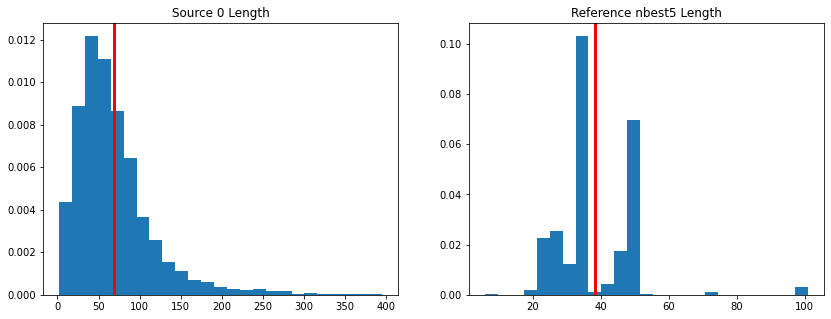

In [53]:
from vizseq.ipynb.core import view_examples, view_stats, view_n_grams, view_scores
from vizseq._view import DEFAULT_PAGE_SIZE, DEFAULT_PAGE_NO, VizSeqSortingType

view_stats(r, h)

In [54]:
from nltk.util import ngrams

In [58]:
list(ngrams(['this', 'is', 'a', 'sentence', '.'], 2))

[('this', 'is'), ('is', 'a'), ('a', 'sentence'), ('sentence', '.')]

In [60]:
list(range(1, 2))

[1]

In [66]:
from vizseq.custom import dinstinct_n as distn

ImportError: cannot import name 'dinstinct_n' from 'vizseq.custom' (unknown location)